# **19. Machine Learning with Tree-Based Models in Python**

Decision trees are supervised learning models used for problems involving classification and regression. Tree models present a high flexibility that comes at a price: on one hand, trees are able to capture complex non-linear relationships; on the other hand, they are prone to memorizing the noise present in a dataset. By aggregating the predictions of trees that are trained differently, ensemble methods take advantage of the flexibility of trees while reducing their tendency to memorize noise. Ensemble methods are used across a variety of fields and have a proven track record of winning many machine learning competitions.


In this course, you'll learn how to use Python to train decision trees and tree-based models with the user-friendly scikit-learn machine learning library. You'll understand the advantages and shortcomings of trees and demonstrate how ensembling can alleviate these shortcomings, all while practicing on real-world datasets. Finally, you'll also understand how to tune the most influential hyperparameters in order to get the most out of your models.


[Reference Link](https://github.com/Anirudh-Chauhan/Data-Scientist-with-Python-DataCamp/tree/2b254aab79c5c7420c9fd96aeeab81a020420a27/19%20-%20Machine%20learning%20with%20tree-based%20models%20in%20python)

## Chapter 1 - Classification and Regression Trees


Classification and Regression Trees (CART) are a set of supervised learning models used for problems involving classification and regression. In this chapter, you'll be introduced to the CART algorithm.


In [22]:
import numpy as np
import pandas as pd   

df = pd.read_csv('wbc.csv')
df.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN


In [68]:
from sklearn.model_selection import train_test_split

# Load the dataset into a DataFrame
df = pd.read_csv('wbc.csv')

# Assuming X_train and X_test are pandas DataFrames
# Accessing the columns 'radius_mean' and 'concave points_mean'
X = df[['radius_mean', 'concave points_mean']]
y = df['diagnosis'].map({'M': 1, 'B': 0})  # Assuming 'M' corresponds to malignant and 'B' corresponds to benign

# Splitting the dataset into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


Train your first classification tree


In [24]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(max_depth=6, random_state=1)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)
print(y_pred[0:5])


[1 0 0 1 0]


Evaluate the classification tree


In [25]:
# Import accuracy_score
from sklearn.metrics import accuracy_score

# Predict test set labels
y_pred = dt.predict(X_test)

# Compute test set accuracy
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.89


**Logistic regression vs classification tree**

A classification tree divides the feature space into rectangular regions. In contrast, a linear model such as logistic regression produces only a single linear decision boundary dividing the feature space into two decision regions.

We have written a custom function called plot_labeled_decision_regions() that you can use to plot the decision regions of a list containing two trained classifiers. You can type help(plot_labeled_decision_regions) in the IPython shell to learn more about this function.

X_train, X_test, y_train, y_test, the model dt that you've trained in an earlier exercise , as well as the function plot_labeled_decision_regions() are available in your workspace.

In [34]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

def plot_labeled_decision_regions(X, y, clfs):
    for clf in clfs:
        plot_decision_regions(X.values, y.values, clf=clf, legend=2)
        plt.xlabel(X.columns[0])
        plt.ylabel(X.columns[1])
        plt.title(str(clf))
        plt.show()


c:\Users\yeiso\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


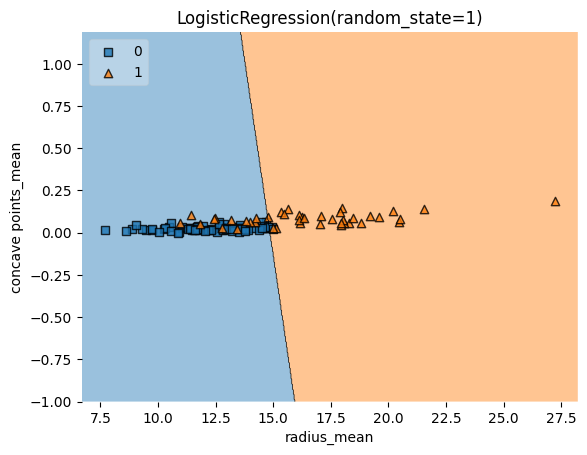

c:\Users\yeiso\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


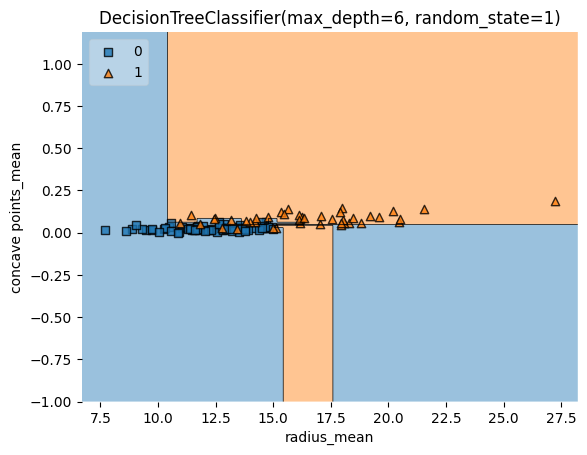

In [35]:
# Import LogisticRegression from sklearn.linear_model
from sklearn.linear_model import  LogisticRegression

# Instantiate logreg
logreg = LogisticRegression(random_state=1)

# Fit logreg to the training set
logreg.fit(X_train, y_train)

# Define a list called clfs containing the two classifiers logreg and dt
clfs = [logreg, dt]

# Review the decision regions of the two classifiers
plot_labeled_decision_regions(X_test, y_test, clfs)

**Using entropy as a criterion**

In this exercise, you'll train a classification tree on the Wisconsin Breast Cancer dataset using entropy as an information criterion. You'll do so using all the 30 features in the dataset, which is split into 80% train and 20% test.

X_train as well as the array of labels y_train are available in your workspace

In [36]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1)

# Fit dt_entropy to the training set
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=1)

**Entropy vs Gini index**

In this exercise you'll compare the test set accuracy of dt_entropy to the accuracy of another tree named dt_gini. The tree dt_gini was trained on the same dataset using the same parameters except for the information criterion which was set to the gini index using the keyword 'gini'.

X_test, y_test, dt_entropy, as well as accuracy_gini which corresponds to the test set accuracy achieved by dt_gini are available in your workspace.

In [45]:
# Import accuracy_score from sklearn.metrics
from sklearn.metrics import accuracy_score

accuracy_gini = 1.000

# Use dt_entropy to predict test set labels
y_pred = dt_entropy.predict(X_test)

# Evaluate accuracy_entropy
accuracy_entropy = accuracy_score(y_test, y_pred)

# Print accuracy_entropy
print(f'Accuracy achieved by using entropy: {accuracy_entropy:.3f}')

# Print accuracy_gini
print(f'Accuracy achieved by using the gini index: {accuracy_gini:.3f}')

Accuracy achieved by using entropy: 0.895
Accuracy achieved by using the gini index: 1.000


**Train your first regression tree**

In this exercise, you'll train a regression tree to predict the mpg (miles per gallon) consumption of cars in the auto-mpg dataset using all the six available features.

The dataset is processed for you and is split to 80% train and 20% test. The features matrix X_train and the array y_train are available in your workspace.

In [46]:
# Import DecisionTreeRegressor from sklearn.tree
from sklearn.tree import DecisionTreeRegressor

# Instantiate dt
dt = DecisionTreeRegressor(max_depth=8,
             min_samples_leaf=0.13,
            random_state=3)

# Fit dt to the training set
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)

**Evaluate the regression tree** 

In this exercise, you will evaluate the test set performance of dt using the Root Mean Squared Error (RMSE) metric. The RMSE of a model measures, on average, how much the model's predictions differ from the actual labels. The RMSE of a model can be obtained by computing the square root of the model's Mean Squared Error (MSE).

The features matrix X_test, the array y_test, as well as the decision tree regressor dt that you trained in the previous exercise are available in your workspace.

In [47]:
# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute y_pred
y_pred = dt.predict(X_test)

# Compute mse_dt
mse_dt = MSE(y_pred, y_test)

# Compute rmse_dt
rmse_dt = mse_dt**(1/2)

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))

Test set RMSE of dt: 0.27


**Linear regression vs regression tree**

In this exercise, you'll compare the test set RMSE of dt to that achieved by a linear regression model. We have already instantiated a linear regression model lr and trained it on the same dataset as dt.

The features matrix X_test, the array of labels y_test, the trained linear regression model lr, mean_squared_error function which was imported under the alias MSE and rmse_dt from the previous exercise are available in your workspace.

In [ ]:
# Predict test set labels
y_pred_lr = lr.predict(X_test)

# Compute mse_lr
mse_lr = MSE(y_pred_lr, y_test)

# Compute rmse_lr
rmse_lr = mse_lr**(1/2)

# Print rmse_lr
print('Linear Regression test set RMSE: {:.2f}'.format(rmse_lr))

# Print rmse_dt
print('Regression Tree test set RMSE: {:.2f}'.format(rmse_dt))

## Chapter 2 - The Bias-Variance Tradeoff

The bias-variance tradeoff is one of the fundamental concepts in supervised machine learning. In this chapter, you'll understand how to diagnose the problems of overfitting and underfitting. You'll also be introduced to the concept of ensembling where the predictions of several models are aggregated to produce predictions that are more robust.

**Instantiate the model**

In the following set of exercises, you'll diagnose the bias and variance problems of a regression tree. The regression tree you'll define in this exercise will be used to predict the mpg consumption of cars from the auto dataset using all available features.

We have already processed the data and loaded the features matrix X and the array y in your workspace. In addition, the DecisionTreeRegressor class was imported from sklearn.tree.

In [49]:
# Import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Set SEED for reproducibility
SEED = 1

# Split the data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=SEED)

# Instantiate a DecisionTreeRegressor dt
dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.26, random_state=SEED)

**Evaluate the 10-fold CV error**

In this exercise, you'll evaluate the 10-fold CV Root Mean Squared Error (RMSE) achieved by the regression tree dt that you instantiated in the previous exercise.

In addition to dt, the training data including X_train and y_train are available in your workspace. We also imported cross_val_score from sklearn.model_selection.

Note that since cross_val_score has only the option of evaluating the negative MSEs, its output should be multiplied by negative one to obtain the MSEs. The CV RMSE can then be obtained by computing the square root of the average MSE.

In [ ]:
# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(dt, X_train, y_train, cv=10,
                                 scoring='neg_mean_squared_error',
                                 n_jobs=-1)

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(RMSE_CV))

**Evaluate the training error**

You'll now evaluate the training set RMSE achieved by the regression tree dt that you instantiated in a previous exercise.

In addition to dt, X_train and y_train are available in your workspace.

Note that in scikit-learn, the MSE of a model can be computed as follows:

MSE_model = mean_squared_error(y_true, y_predicted)
where we use the function mean_squared_error from the metrics module and pass it the true labels y_true as a first argument, and the predicted labels from the model y_predicted as a second argument.

In [51]:
# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict the labels of the training set
y_pred_train = dt.predict(X_train)

# Evaluate the training set RMSE of dt
RMSE_train = (MSE(y_train, y_pred_train))**(1/2)

# Print RMSE_train
print('Train RMSE: {:.2f}'.format(RMSE_train))

Train RMSE: 0.27


**Define the ensemble**

In the following set of exercises, you'll work with the Indian Liver Patient Dataset from the UCI Machine learning repository.

In this exercise, you'll instantiate three classifiers to predict whether a patient suffers from a liver disease using all the features present in the dataset.

The classes LogisticRegression, DecisionTreeClassifier, and KNeighborsClassifier under the alias KNN are available in your workspace.

In [53]:
# Set seed for reproducibility
SEED = 1

# Import LogisticRegression from sklearn.linear_model
from sklearn.linear_model import LogisticRegression

# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate lr
lr = LogisticRegression(random_state=SEED)

# Instantiate knn
knn = KNeighborsClassifier(n_neighbors=27)

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=0.13, random_state=SEED)

# Define the list classifiers
classifiers = [('Logistic Regression', lr), ('K Nearest Neighbors', knn), ('Classification Tree', dt)]


**Evaluate individual classifiers**

In this exercise you'll evaluate the performance of the models in the list classifiers that we defined in the previous exercise. You'll do so by fitting each classifier on the training set and evaluating its test set accuracy.

The dataset is already loaded and preprocessed for you (numerical features are standardized) and it is split into 70% train and 30% test. The features matrices X_train and X_test, as well as the arrays of labels y_train and y_test are available in your workspace. In addition, we have loaded the list classifiers from the previous exercise, as well as the function accuracy_score() from sklearn.metrics.

In [55]:
# Iterate over the pre-defined list of classifiers
for clf_name, clf in classifiers:

    # Fit clf to the training set
    clf.fit(X_train, y_train)

    # Predict y_pred
    y_pred = clf.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_pred, y_test)

    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy))

Logistic Regression : 0.848
K Nearest Neighbors : 0.860
Classification Tree : 0.906


**Better performance with a Voting Classifier** 

Finally, you'll evaluate the performance of a voting classifier that takes the outputs of the models defined in the list classifiers and assigns labels by majority voting.

X_train, X_test,y_train, y_test, the list classifiers defined in a previous exercise, as well as the function accuracy_score from sklearn.metrics are available in your workspace.

In [57]:
# Import VotingClassifier from sklearn.ensemble
from sklearn.ensemble import VotingClassifier

# Instantiate a VotingClassifier vc
vc = VotingClassifier(estimators=classifiers)

# Fit vc to the training set
vc.fit(X_train, y_train)

# Evaluate the test set predictions
y_pred = vc.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_pred, y_test)
print('Voting Classifier: {:.3f}'.format(accuracy))


Voting Classifier: 0.854


## Chapter 3 - Bagging and Random Forests

Bagging is an ensemble method involving training the same algorithm many times using different subsets sampled from the training data. In this chapter, you'll understand how bagging can be used to create a tree ensemble. You'll also learn how the random forests algorithm can lead to further ensemble diversity through randomization at the level of each split in the trees forming the ensemble.



**Define the bagging classifier**

In the following exercises you'll work with the Indian Liver Patient dataset from the UCI machine learning repository. Your task is to predict whether a patient suffers from a liver disease using 10 features including Albumin, age and gender. You'll do so using a Bagging Classifier.

In [58]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate dt
dt = DecisionTreeClassifier(random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, n_estimators=50, random_state=1)

**Evaluate Bagging performance**

Now that you instantiated the bagging classifier, it's time to train it and evaluate its test set accuracy.

The Indian Liver Patient dataset is processed for you and split into 80% train and 20% test. The feature matrices X_train and X_test, as well as the arrays of labels y_train and y_test are available in your workspace. In addition, we have also loaded the bagging classifier bc that you instantiated in the previous exercise and the function accuracy_score() from sklearn.metrics.

In [59]:
# Fit bc to the training set
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate acc_test
acc_test = accuracy_score(y_pred, y_test)
print('Test set accuracy of bc: {:.2f}'.format(acc_test))

Test set accuracy of bc: 0.89


c:\Users\yeiso\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


**Prepare the ground** 

In the following exercises, you'll compare the OOB accuracy to the test set accuracy of a bagging classifier trained on the Indian Liver Patient dataset.

In sklearn, you can evaluate the OOB accuracy of an ensemble classifier by setting the parameter oob_score to True during instantiation. After training the classifier, the OOB accuracy can be obtained by accessing the .oob_score_ attribute from the corresponding instance.

In your environment, we have made available the class DecisionTreeClassifier from sklearn.tree.

In [60]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=8, random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt,
            n_estimators=50,
            oob_score=True,
            random_state=1)

**OOB Score vs Test Set Score**

Now that you instantiated bc, you will fit it to the training set and evaluate its test set and OOB accuracies.

The dataset is processed for you and split into 80% train and 20% test. The feature matrices X_train and X_test, as well as the arrays of labels y_train and y_test are available in your workspace. In addition, we have also loaded the classifier bc instantiated in the previous exercise and the function accuracy_score() from sklearn.metrics.

In [61]:
# Fit bc to the training set
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate test set accuracy
acc_test = accuracy_score(y_pred, y_test)

# Evaluate OOB accuracy
acc_oob = bc.oob_score_

# Print acc_test and acc_oob
print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(acc_test, acc_oob))

Test set accuracy: 0.918, OOB accuracy: 0.894


c:\Users\yeiso\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


**Train an RF regressor** 

In the following exercises you'll predict bike rental demand in the Capital Bikeshare program in Washington, D.C using historical weather data from the Bike Sharing Demand dataset available through Kaggle. For this purpose, you will be using the random forests algorithm. As a first step, you'll define a random forests regressor and fit it to the training set.

The dataset is processed for you and split into 80% train and 20% test. The features matrix X_train and the array y_train are available in your workspace.

In [62]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate rf
rf = RandomForestRegressor(n_estimators=25,
            random_state=2)

# Fit rf to the training set
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=25, random_state=2)

**Evaluate the RF regressor** 

You'll now evaluate the test set RMSE of the random forests regressor rf that you trained in the previous exercise.

The dataset is processed for you and split into 80% train and 20% test. The features matrix X_test, as well as the array y_test are available in your workspace. In addition, we have also loaded the model rf that you trained in the previous exercise.

In [63]:
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Predict the test set labels
y_pred = rf.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print rmse_test
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 0.29


**Visualizing features importances** 

In this exercise, you'll determine which features were the most predictive according to the random forests regressor rf that you trained in a previous exercise.

For this purpose, you'll draw a horizontal barplot of the feature importance as assessed by rf. Fortunately, this can be done easily thanks to plotting capabilities of pandas.

We have created a pandas.Series object called importances containing the feature names as index and their importances as values. In addition, matplotlib.pyplot is available as plt and pandas as pd.

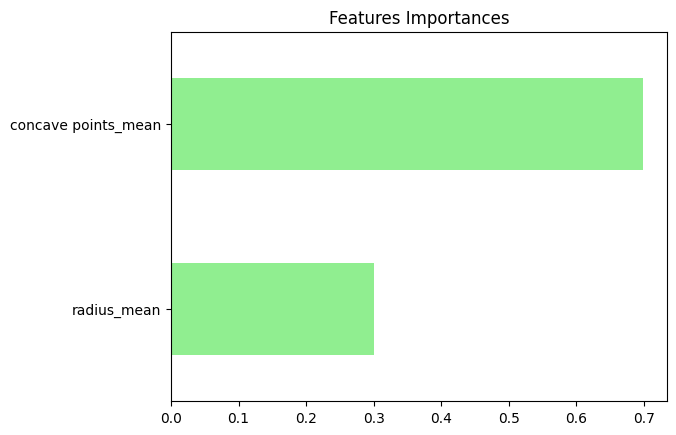

In [64]:
# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_,
                      index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

## **Chapter 4 - Boosting**

Boosting refers to an ensemble method in which several models are trained sequentially with each model learning from the errors of its predecessors. In this chapter, you'll be introduced to the two boosting methods of AdaBoost and Gradient Boosting.



In [65]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

# Instantiate dt
dt = DecisionTreeClassifier(max_depth=2, random_state=1)

# Instantiate ada
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=180, random_state=1)

**Train the AdaBoost classifier** 

Now that you've instantiated the AdaBoost classifier ada, it's time train it. You will also predict the probabilities of obtaining the positive class in the test set. This can be done as follows:

Once the classifier ada is trained, call the .predict_proba() method by passing X_test as a parameter and extract these probabilities by slicing all the values in the second column as follows:

    ada.predict_proba(X_test)[:,1]

The Indian Liver dataset is processed for you and split into 80% train and 20% test. Feature matrices X_train and X_test, as well as the arrays of labels y_train and y_test are available in your workspace. In addition, we have also loaded the instantiated model ada from the previous exercise.

In [66]:
# Fit ada to the training set
ada.fit(X_train, y_train)

# Compute the probabilities of obtaining the positive class
y_pred_proba = ada.predict_proba(X_test)[:,1]

c:\Users\yeiso\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


**Evaluate the AdaBoost classifier**

Now that you're done training ada and predicting the probabilities of obtaining the positive class in the test set, it's time to evaluate ada's ROC AUC score. Recall that the ROC AUC score of a binary classifier can be determined using the roc_auc_score() function from sklearn.metrics.

The arrays y_test and y_pred_proba that you computed in the previous exercise are available in your workspace.

In [67]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Evaluate test-set roc_auc_score
ada_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print roc_auc_score
print('ROC AUC score: {:.2f}'.format(ada_roc_auc))

ROC AUC score: 0.95


**Define the GB regressor**

You'll now revisit the Bike Sharing Demand dataset that was introduced in the previous chapter. Recall that your task is to predict the bike rental demand using historical weather data from the Capital Bikeshare program in Washington, D.C.. For this purpose, you'll be using a gradient boosting regressor.

As a first step, you'll start by instantiating a gradient boosting regressor which you will train in the next exercise.

In [75]:
import numpy as np
import pandas as pd   

df = pd.read_csv('bikes.csv')
df.head(3)

,hr,holiday,workingday,temp,hum,windspeed,cnt,instant,mnth,yr,Clear to partly cloudy,Light Precipitation,Misty
0,0,0,0,0.76,0.66,0.0000,149,13004,7,1,1,0,0
1,1,0,0,0.74,0.70,0.1343,93,13005,7,1,1,0,0
2,2,0,0,0.72,0.74,0.0896,90,13006,7,1,1,0,0


In [76]:
# Import GradientBoostingRegressor from sklearn.ensemble
from sklearn.ensemble import GradientBoostingRegressor

# Set seed for reproducibility
SEED = 1

# Instantiate the GradientBoostingRegressor
gb_regressor = GradientBoostingRegressor(random_state=SEED)


In [77]:
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate gb
gb = GradientBoostingRegressor(max_depth=4,
            n_estimators=200,
            random_state=2)

**Train the GB regressor**

You'll now train the gradient boosting regressor gb that you instantiated in the previous exercise and predict test set labels.

The dataset is split into 80% train and 20% test. Feature matrices X_train and X_test, as well as the arrays y_train and y_test are available in your workspace. In addition, we have also loaded the model instance gb that you defined in the previous exercise.

In [78]:
# Fit gb to the training set
gb.fit(X_train, y_train)

# Predict test set labels
y_pred = gb.predict(X_test)

**Evaluate the GB regressor**

Now that the test set predictions are available, you can use them to evaluate the test set Root Mean Squared Error (RMSE) of gb.

y_test and predictions y_pred are available in your workspace.

In [79]:
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute MSE
mse_test = MSE(y_test, y_pred)

# Compute RMSE
rmse_test = mse_test**(1/2)

# Print RMSE
print('Test set RMSE of gb: {:.3f}'.format(rmse_test))

Test set RMSE of gb: 0.301


**Regression with SGB**

As in the exercises from the previous lesson, you'll be working with the Bike Sharing Demand dataset. In the following set of exercises, you'll solve this bike count regression problem using stochastic gradient boosting.

In [80]:
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate sgbr
sgbr = GradientBoostingRegressor(max_depth=4,
                                subsample=0.9,
                                max_features=0.75,
                                n_estimators=200,
                                random_state=2)

**Train the SGB regressor**

In this exercise, you'll train the SGBR sgbr instantiated in the previous exercise and predict the test set labels.

The bike sharing demand dataset is already loaded processed for you; it is split into 80% train and 20% test. The feature matrices X_train and X_test, the arrays of labels y_train and y_test, and the model instance sgbr that you defined in the previous exercise are available in your workspace.

In [81]:
# Fit sgbr to the training set
sgbr.fit(X_train, y_train)

# Predict test set labels
y_pred = sgbr.predict(X_test)

**Evaluate the SGB regressor**

You have prepared the ground to determine the test set RMSE of sgbr which you shall evaluate in this exercise.

y_pred and y_test are available in your workspace.

In [83]:
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute test set MSE
mse_test = MSE(y_test, y_pred)

# Compute test set RMSE
rmse_test = mse_test**(1/2)

# Print rmse_test
print('Test set RMSE of sgbr: {:.3f}'.format(rmse_test))

Test set RMSE of sgbr: 0.307


## **Chapter 5 - Model Tuning**

The hyperparameters of a machine learning model are parameters that are not learned from data. They should be set prior to fitting the model to the training set. In this chapter, you'll learn how to tune the hyperparameters of a tree-based model using grid search cross validation.



**Set the tree's hyperparameter grid**

In this exercise, you'll manually set the grid of hyperparameters that will be used to tune the classification tree dt and find the optimal classifier in the next exercise.

In [84]:
#Define params_dt
params_dt = {'max_depth' : [2, 3, 4],
             'min_samples_leaf' : [0.12, 0.14, 0.16, 0.18]}

**Search for the optimal tree**

In this exercise, you'll perform grid search using 5-fold cross validation to find dt's optimal hyperparameters. Note that because grid search is an exhaustive process, it may take a lot time to train the model. Here you'll only be instantiating the GridSearchCV object without fitting it to the training set. As discussed in the video, you can train such an object similar to any scikit-learn estimator by using the .fit() method:

grid_object.fit(X_train, y_train)
An untuned classification tree dt as well as the dictionary params_dt that you defined in the previous exercise are available in your workspace.

In [85]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Instantiate grid_dt
grid_dt = GridSearchCV(estimator=dt,
                      param_grid=params_dt,
                      scoring='roc_auc',
                      cv=5,
                      n_jobs=-1)

**Evaluate the optimal tree**

In this exercise, you'll evaluate the test set ROC AUC score of grid_dt's optimal model.

In order to do so, you will first determine the probability of obtaining the positive label for each test set observation. You can use the methodpredict_proba() of an sklearn classifier to compute a 2D array containing the probabilities of the negative and positive class-labels respectively along columns.

The dataset is already loaded and processed for you (numerical features are standardized); it is split into 80% train and 20% test. X_test, y_test are available in your workspace. In addition, we have also loaded the trained GridSearchCV object grid_dt that you instantiated in the previous exercise. Note that grid_dt was trained as follows:

    grid_dt.fit(X_train, y_train)   

In [ ]:
# Import roc_auc_score from sklearn.metrics
from sklearn.metrics import roc_auc_score

# Extract the best estimator
best_model = grid_dt.best_estimator_

# Predict the test set probabilities of the positive class
y_pred_proba = best_model.predict_proba(X_test)[:,1]

# Compute test_roc_auc
test_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))


# <script.py> output:
#     Test set ROC AUC score: 0.610

**Set the hyperparameter grid of RF**

In this exercise, you'll manually set the grid of hyperparameters that will be used to tune rf's hyperparameters and find the optimal regressor. For this purpose, you will be constructing a grid of hyperparameters and tune the number of estimators, the maximum number of features used when splitting each node and the minimum number of samples (or fraction) per leaf.

In [89]:
# Define the dictionary 'params_rf'
params_rf = {'n_estimators':[100,350,500],
             'max_features':['log2','auto','sqrt'],
             'min_samples_leaf':[2,10,30]}

**Search for the optimal forest**

In this exercise, you'll perform grid search using 3-fold cross validation to find rf's optimal hyperparameters. To evaluate each model in the grid, you'll be using the negative mean squared error metric.

Note that because grid search is an exhaustive search process, it may take a lot time to train the model. Here you'll only be instantiating the GridSearchCV object without fitting it to the training set. As discussed in the video, you can train such an object similar to any scikit-learn estimator by using the .fit() method:

grid_object.fit(X_train, y_train)
The untuned random forests regressor model rf as well as the dictionary params_rf that you defined in the previous exercise are available in your workspace.

In [90]:
# Import GridSearchCV
from sklearn.model_selection import  GridSearchCV

# Instantiate grid_rf
grid_rf = GridSearchCV(estimator=rf,
                      param_grid=params_rf,
                      scoring='neg_mean_squared_error',
                      cv=3,
                      verbose=1,
                      n_jobs=-1)

**Evaluate the optimal forest** 

In this last exercise of the course, you'll evaluate the test set RMSE of grid_rf's optimal model.

The dataset is already loaded and processed for you and is split into 80% train and 20% test. In your environment are available X_test, y_test and the function mean_squared_error from sklearn.metrics under the alias MSE. In addition, we have also loaded the trained GridSearchCV object grid_rf that you instantiated in the previous exercise. Note that grid_rf was trained as follows:

    grid_rf.fit(X_train, y_train)

In [ ]:
# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

# Extract the best estimator
best_model = grid_rf.best_estimator_

# Predict test set labels
y_pred = best_model.predict(X_test)

# Compute rmse_test
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print rmse_test
print('Test RMSE of best model: {:.3f}'.format(rmse_test))